# **Project Assignment**

*Cacciatore Davide 2015641*

*Ghinassi Arturo 1863151*

*Savarese Camilla 1838890*

We used the dataset provided by the MAWI project, in which the amount of the trace is equal to 5 mln packets retrieved from the traffic trace of 10/04/2019.

### IMPORTS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/NBD Homeworks/Cianfrani/Final Project/notebook

from random import sample
!pip install pyshark
import pyshark
import pandas as pd
!pip install pickle5
import pickle5 as pickle
import matplotlib.pyplot as plt
from termcolor import colored
!pip install beautifultable
from beautifultable import BeautifulTable
!pip install ip2geotools
from ip2geotools.databases.noncommercial import DbIpCity
import copy
import folium
import os
import shutil
import sys
import glob
import numpy as np
import seaborn as sns
from collections import Counter
import networkx as nx
!pip install kneed
from kneed import KneeLocator
from tqdm import tqdm
import math
import operator

#Scikit-Learn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans


def load_pickle(path):
    with open(f"{path}", 'rb',) as f:
        return pickle.load(f)

def save_pickle(element, path):
    with open(f"{path}", 'wb') as f:
        pickle.dump(element, f, pickle.HIGHEST_PROTOCOL)

df = load_pickle(r'/content/drive/MyDrive/NBD Homeworks/Cianfrani/Final Project/notebook/PacketDataFrame.pickle')

# =============================================================================
# Global Settings for Plots
# =============================================================================

plt.rcParams['axes.facecolor'] = 'aliceblue'
plt.rcParams['axes.edgecolor'] = 'grey'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams['axes.axisbelow'] = True

label_size = 13
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 

def bitRate(data, step_sec = 1):
    start = data.iloc[0]["time"]
    finish = data.iloc[-1]["time"]
    #print("\nStart: ",start)
    #print("Finish: ",finish)
    
    
    data.iloc[:]["time"] -= data.iloc[0]["time"]
    start = data.iloc[0]["time"]
    finish = data.iloc[-1]["time"]
    
    #print("\nStart: ",start)
    #print("Finish: ",finish)
    
    step = finish / step_sec
    finish = start + step_sec
    value = []
    #print(step, '\n')
    for i in range(int(step)):
    
        #From Byte to bit - selection of the time interval between the start and the end of a single time slot
        val = np.sum(data[(data["time"]>=start) & (data["time"]<finish)]["length"]*8)
        if not np.isnan(val):
            value.append(val/step_sec)
        start = finish 
        finish = start + step_sec
        
    return value

def visualization1(directed, nodes, edges, average_link, density, degree_freq):
    '''
    Our feature1 plot!
    this computes every requested feature and returns a table visualization!
    '''
    table = BeautifulTable()
    table.set_style(BeautifulTable.STYLE_BOX_DOUBLED)

    table.rows.append(['Number of users', nodes])
    table.rows.append(['Number of connections', edges])
    table.rows.append(['Average number of links per user', round(average_link, 4)])
    table.rows.append(['Dense', colored('True' if (density > 0.5) else 'False', 'green' if (density > 0.5) else 'red')])

    print(table)
    
    degrees = range(len(degree_freq))
    plt.figure(figsize=(15, 10)) 
    plt.loglog(degrees, degree_freq,'-ok', alpha = 0.8, markersize=5, linewidth=0.5,
             markerfacecolor='m', markeredgecolor='cyan', markeredgewidth=0.5) 

    plt.xlabel('Degree');
    plt.ylabel('Frequency');

def check_directed(graph_sources, graph_destinations):
    '''
    Check if a graph is directed or not
    '''
    if any(dest not in graph_sources for dest in graph_destinations):
        return True
    # check for back routing edges, if there is at least one element
    if any(source not in graph_destinations for source in graph_sources):
        return True
    return False

def functionality1(graph):
    '''
    our functionality 1, extracts all requested values from [graph]
    '''
    degree_freq = graph['IP_DST'].value_counts()
    
    sources = np.array(graph.iloc[:, 0])
    destinations = np.array(graph.iloc[:, 1])
    
    out = check_directed(sources, destinations)
    edges = len(sources)
    
    users = set(sources).union(set(destinations))
    
    nodes = len(users)
    
    average_link = np.round(edges/nodes, 2)
    
    if out: # checking if the graph is directed
        
        # if a graph is directed the density is defined as: |E| / |V|*(|V|-1)
        density = edges/(nodes*(nodes-1)) 
    
    else:
        
        # if a graph is undirected: 2*|E| / |V|*(|V|-1)
        density = (2*edges)/(nodes*(nodes-1))
    
    return visualization1(out, nodes, edges, average_link, density, degree_freq)

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1N1XQzNjVNKewIKxCBXL4JGukoU6mBjRr/NBD Homeworks/Cianfrani/Final Project/notebook
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 14.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 17.7 MB/s 
     |████████████████████████████████| 98 kB 10.1 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 330 kB 75.1 MB/s 
     |████████████████████████████████| 983 kB 57.5 MB/s 
     |████████████████████████████████| 45 kB 4.5 MB/s 
     |████████████████████████████████| 829 kB 75.7 MB/s 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## PART A

### Importing time (Intel i5-8265U CPU @ 1.60GHz   1.80 GHz and RAM 8GB)

#### Sequential

T = (670 + 674 + 677 + 666) seconds = 2687 seconds = 45 minutes

#### Parallel

T = 1283 seconds = 22 minutes

### 3. TOP SENDER 

*Extract the IP which generates the highest amount as sender traffic, evaluate the bit rate (0.1 sec) for the 6 IP addresses mostly used as endpoint.*

In [ ]:
# Find the top sender
top_sender = df.groupby(["IP_SRC"])[['length']].agg('sum').sort_values(by=['length'], ascending=False).index[0]
print('The IP who sent the most bit of data is:', top_sender)                                                                                               

The IP who sent the most bit of data is: 150.57.136.251


122.60.253.245
153.153.206.192
115.181.56.11
66.132.46.70
39.18.205.141
115.181.56.9


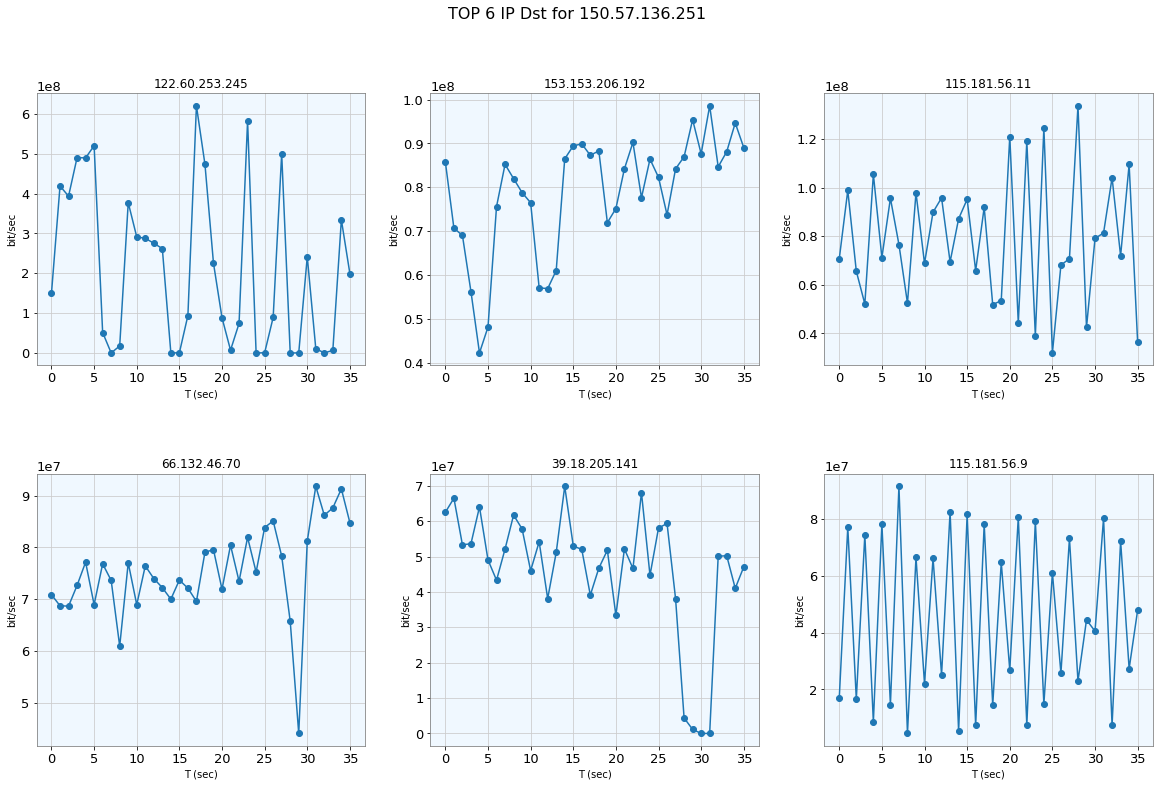

In [ ]:
top_sender = "150.57.136.251"

# Dataframe containing all the endpoints used by the top sender
top_sender_df = df[df["IP_SRC"] == top_sender]
grouped = top_sender_df.groupby(["IP_DST"]).agg('sum').sort_values(by=['length'], ascending=False).head(6)
data_couple = top_sender_df.groupby(["IP_DST"])
rowlength = int(grouped.shape[0]/2)   
fig, axs = plt.subplots(figsize=(20,12), 
                        nrows=2, ncols=rowlength,     
                        gridspec_kw=dict(hspace=0.4)) 

targets = zip(grouped.index, axs.flatten())

# Plot
for i, (key, ax) in enumerate(targets):
    print(key) # TOP 6 IP addresses
    ax.plot(bitRate(data_couple.get_group(key), 0.1),marker = "o")
    ax.set_title(key)
    ax.set_xlabel("T (sec)")
    ax.set_ylabel("bit/sec")

fig.suptitle('TOP 6 IP Dst for 150.57.136.251', fontsize=16)
#plt.savefig(folder_image + "TOP 6 IP Dst for_IP")

del([top_sender, grouped, data_couple])

### 4. TOP 5 DESTINATIONS AND SENDER

*Top 5 Destination IP (received bytes) and Top 5 Source IP (sent bytes).*

#### DESTINATION

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

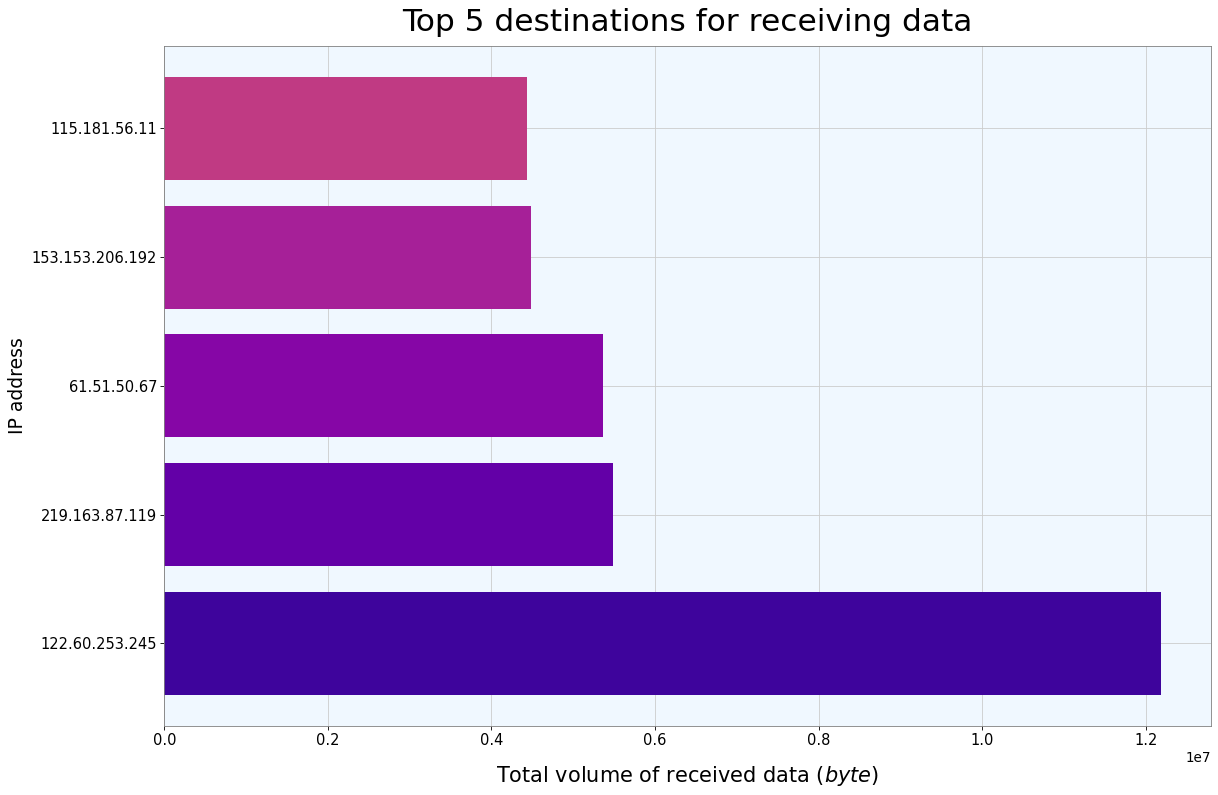

In [ ]:
# Extract the top 5 destinations
data_couple = df.groupby(["IP_DST"])[['length']].agg('sum').sort_values(by=['length'], ascending=False).head(5)

# Plot
plt.figure(figsize = (18, 12), dpi = 75)
plt.barh(data_couple.index, data_couple['length']/8, color = sns.color_palette('plasma', 10))
plt.title('Top 5 destinations for receiving data', fontsize = 30, loc = 'center', pad = 15)
plt.ylabel('IP address', fontsize = 18, labelpad = 5)
plt.xlabel('Total volume of received data ($byte$)', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.savefig(folder_image +"TOP Receiver")

#### SENDER

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

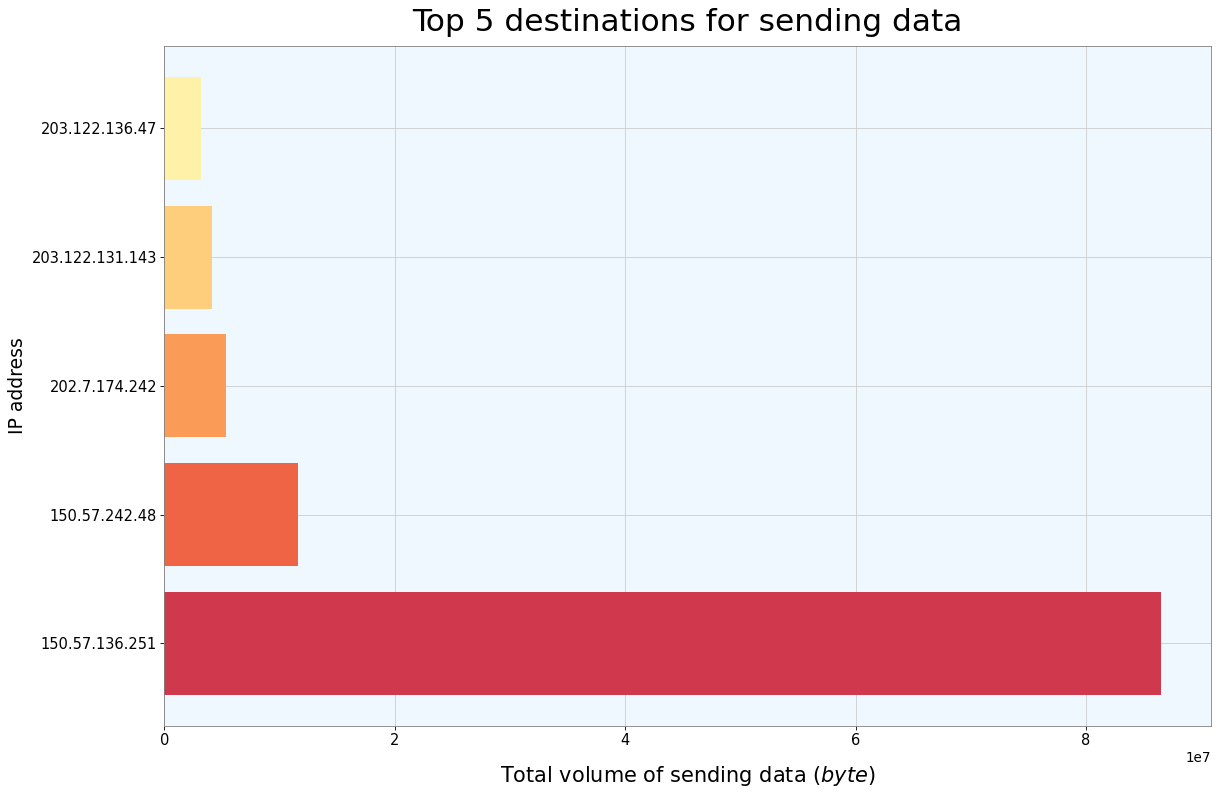

In [ ]:
# Extract the top 5 senders
data_couple = df.groupby(["IP_SRC"])[['length']].agg('sum').sort_values(by=['length'], ascending=False).head(5)

# Plot
plt.figure(figsize = (18, 12), dpi = 75)
plt.barh(data_couple.index, data_couple['length']/8, color = sns.color_palette('Spectral', 10))
plt.title('Top 5 destinations for sending data', fontsize = 30, loc = 'center', pad = 15)
plt.ylabel('IP address', fontsize = 18, labelpad = 5)
plt.xlabel('Total volume of sending data ($byte$)', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.savefig(folder_image +"TOP Sender")

### 5. Evaluate BitRate

*Evaluate BitRate considering all the trace with 3 different sampling rates.*

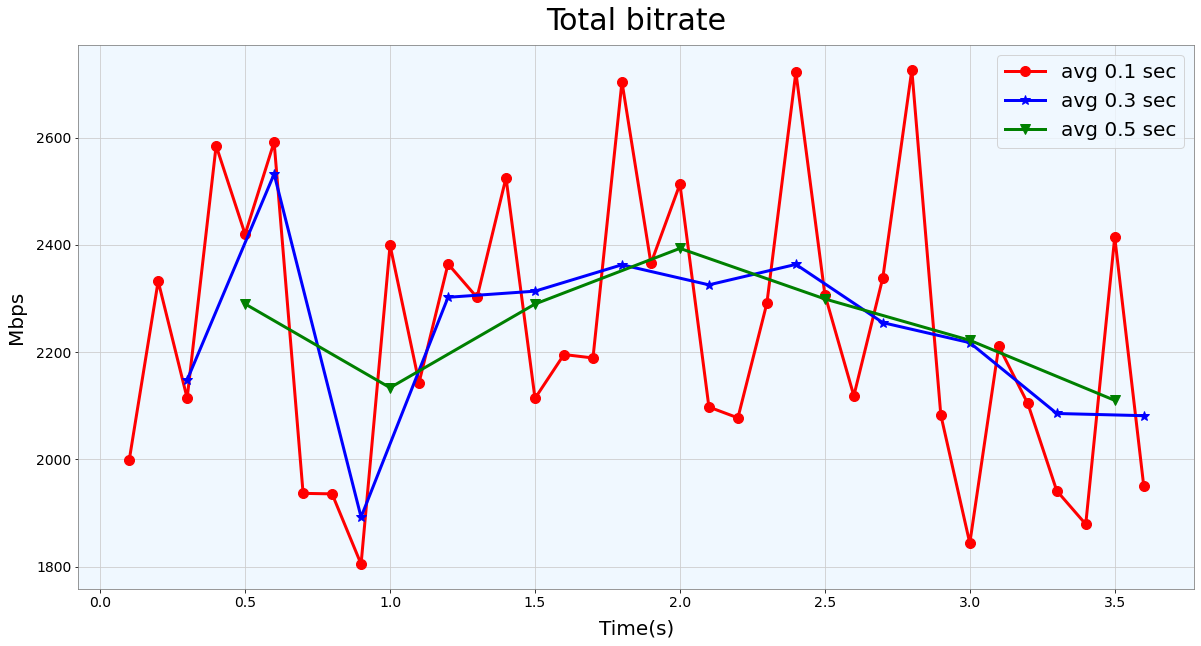

In [ ]:
# Plot
plt.figure(figsize = (20, 10))

# Sampling rate = 0.1 sec
plt.plot([ i*0.1 for i in range(1,len(list(map(lambda x: x/1e6, bitRate(df,0.1))))+1)], list(map(lambda x: x/1e6, bitRate(df,0.1))),
         color = 'red',marker="o",label = "avg 0.1 sec", linewidth = 3, markersize = 10)

# Sampling rate = 0.3 sec
plt.plot([ i*0.3 for i in range(1,len(list(map(lambda x: x/1e6, bitRate(df,0.3))))+1)], list(map(lambda x: x/1e6, bitRate(df,0.3))), 
         color = 'blue',marker="*",label = "avg 0.3 sec", linewidth = 3, markersize = 10)

# Sampling rate = 0.5 sec
plt.plot([ i*0.5 for i in range(1,len(list(map(lambda x: x/1e6, bitRate(df,0.5))))+1)], list(map(lambda x: x/1e6, bitRate(df,0.5))), 
         color = 'green', marker="v",label = "avg 0.5 sec", linewidth = 3, markersize = 10)

plt.xlabel('Time(s)', fontsize = 20, labelpad = 10)
plt.ylabel('Mbps', fontsize = 20, labelpad = 10)
plt.title('Total bitrate', fontsize = 30, pad = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize=20,loc="best")
#plt.savefig(folder_image +"BitRate different Averages")

### 6. GeoLocal Referenciation

*GeoLocal Referenciation of the 5 sessions with the higest amount of traffic generated.*

In [ ]:
# Function to extract geographical informations
def geo_infos(ip_src_list, ip_dst_list):

  src_geo_info = []
  dst_geo_info = []
  i = 0

  for j in range(len(ip_src_list)):
    try:
      src_response = DbIpCity.get(ip_src_list[j], api_key='free')
      dst_response = DbIpCity.get(ip_dst_list[j], api_key='free')
    except:
      continue
    if src_response.latitude == None or dst_response.latitude == None: 
      continue
    i +=1
    src_geo_info.append([src_response.latitude, src_response.longitude, src_response.region])
    dst_geo_info.append([dst_response.latitude, dst_response.longitude, dst_response.region])
    if i == 10: break

  return src_geo_info, dst_geo_info

# Create a copy of the dataframe
data_couple = copy.deepcopy(df)

df_srcdst = list(zip(data_couple.IP_SRC, data_couple.IP_DST))

# Get the 5 most common couples
mostcommon_srcdst = Counter(df_srcdst).most_common(5)

list_src = []
list_dst = []

for i in range(len(mostcommon_srcdst)):
    list_src.append(mostcommon_srcdst[i][0][0]) #src pos 0
    list_dst.append(mostcommon_srcdst[i][0][1]) #dst pos 1

# 5 Couples
src_geo, dst_geo = geo_infos(list_src, list_dst)

src_geo = pd.DataFrame(src_geo, columns=['latitude', 'longitude', 'region'])
dst_geo = pd.DataFrame(dst_geo, columns=['latitude', 'longitude', 'region'])

print("Data:  \n")
print(src_geo)
print()
print(dst_geo)
print("\n")

Data:  

    latitude   longitude    region
0  40.712728  -74.006015  New York
1  35.693810  139.753216     Tokyo
2  40.712728  -74.006015  New York
3  35.693810  139.753216     Tokyo
4  35.693810  139.753216     Tokyo

    latitude   longitude    region
0  45.428475  -75.676440   Ontario
1 -36.848588  174.764469  Auckland
2  45.428475  -75.676440   Ontario
3  35.693810  139.753216     Tokyo
4  39.910867  116.359922   Beijing




In [ ]:
# Setting of the world map
flow_map = folium.Map([0, 0], zoom_start=2, tiles='Stamen Terrain')

# Add lines and markers to the map
for i in range(len(src_geo)):
  folium.Marker([src_geo.loc[i][0], src_geo.loc[i][1]], popup='<i>Mt. Hood Meadows</i>', 
                icon=folium.Icon(color='green')).add_to(flow_map)
  folium.Marker([dst_geo.loc[i][0], dst_geo.loc[i][1]], popup='<i>Mt. Hood Meadows</i>',  
                icon=folium.Icon(color='red')).add_to(flow_map)
  folium.PolyLine([(src_geo.loc[i][0], src_geo.loc[i][1]), (dst_geo.loc[i][0], dst_geo.loc[i][1])], 
                  color="blue", weight=1.5, opacity=1).add_to(flow_map)

#flow_map.save(folder_image +"Map_top_5_flows.html")
display(flow_map)

### 7. Protocol mostly used

*Found the protocols mostly used.*

TCP        11838
ICMP       10720
UDP         7770
IPv4          10
ESP            8
GRE            4
OSPFIGP        1
ETHERIP        1
Name: Protocol, dtype: int64


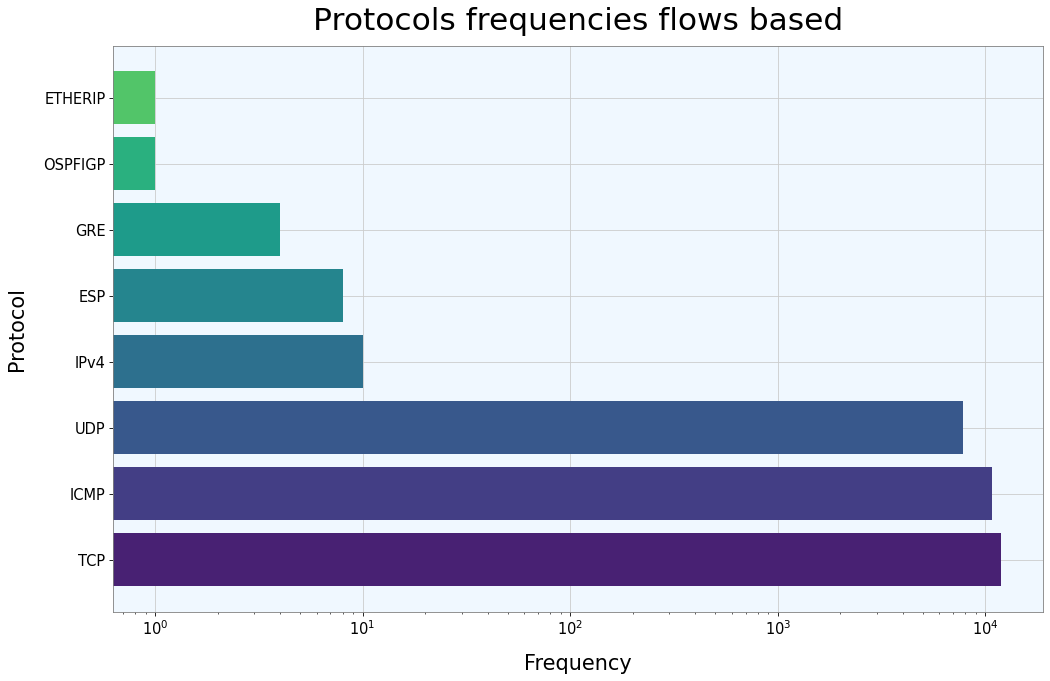

In [ ]:
# Aggregate the flows
grouped_flows = df.groupby(['IP_SRC', 'IP_DST', 'Protocol', 'src_port', 'dst_port']).agg(tot_len = pd.NamedAgg(column = 'length', aggfunc = 'sum')).reset_index()
# Replace the code of the protocols with their actual names
grouped_flows["Protocol"] = grouped_flows["Protocol"].replace({1:"ICMP", 6:"TCP", 17:"UDP", 4:'IPv4', 50:'ESP', 47:'GRE', 89:'OSPFIGP', 97:'ETHERIP'})

#Protocol Frequencies
print(grouped_flows.Protocol.value_counts())

# Plot
plt.figure(figsize = (16, 10), dpi = 75)
plt.barh(grouped_flows.Protocol.value_counts().index, grouped_flows.Protocol.value_counts().values, color = sns.color_palette('viridis', 10))
plt.title('Protocols frequencies flows based', fontsize = 30, loc = 'center', pad = 15)
plt.xlabel('Frequency', fontsize = 20, labelpad = 15)
plt.ylabel('Protocol', fontsize = 20, labelpad = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xscale('log')
#plt.savefig(folder_image +"Protocol Analysis")


### 8. Port scanner evaluation

*Top 10 ports mostly used.*


Src Ports: 
    port   count
18    80  288752
9    443  208351
21   873   15953
23   993    2083
14    53    1603
2    123     965
24   995     484
8     25     222
6     22     205
5     21      70
Dst Ports: 
    port   count
13   443  149209
21    80   91405
17    53    4672
24   873    3186
27   993    2066
11    25     485
1    123     255
8     21     110
9     22      81
15   500      41



Text(0, 0.5, 'Count (logscale)')

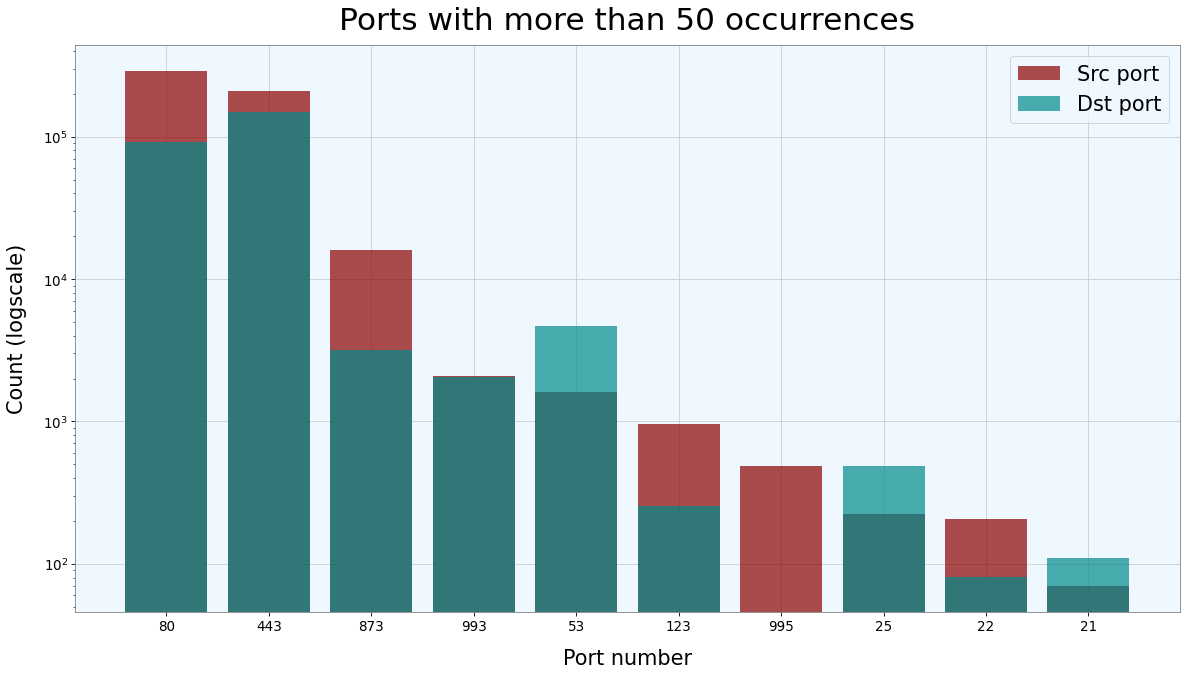

In [ ]:
def port_scan (x, dic):
    ''' scan through the ports and update the counter at each import file. 
    save only the info for the well-known ports '''
    
    for port in x:
        if pd.isnull(port) == False:
            #Well-Known Ports
            if int(port) < 1024 and int(port) >= 0:
                if port not in dic.keys():
                    dic[port] = 1
                else:
                    dic[port] += 1
    return(dic)

#Scanning port analysing pandasDataframe, both for source and destination ports
source_ports = {}
source_ports = port_scan(df["src_port"], source_ports)
dest_ports = {}
dest_ports = port_scan(df["dst_port"], dest_ports)


pd.DataFrame.from_dict(source_ports, orient = 'index').to_json('./source_ports.json')
pd.DataFrame.from_dict(dest_ports, orient = 'index').to_json('./dest_ports.json')


sports = pd.read_json('./source_ports.json')
dports = pd.read_json('./dest_ports.json')

sports = sports.reset_index()
dports = dports.reset_index()
sports = sports.rename(columns = {'index':'port', 0:'count'})
dports = dports.rename(columns = {'index':'port', 0:'count'})


sports = sports.sort_values(by = 'count', ascending = False).head(10)
dports = dports.sort_values(by = 'count', ascending = False).head(10)

print()
print("Src Ports: ")
print(sports)
print("Dst Ports: ")
print(dports)
print()

# Plot
plt.figure(figsize = (19, 10), dpi = 75)
plt.bar(x = list(map(str, list(sports.loc[sports['count'] > 50,'port']))), color = 'darkred', height = list(sports.loc[sports['count'] > 50,'count']), label = 'Src port', alpha = 0.7)
plt.bar(x = list(map(str, list(dports.loc[dports['count'] > 50,'port']))), color = 'darkcyan', height = list(dports.loc[dports['count'] > 50,'count']), label = 'Dst port', alpha = 0.7)
plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Ports with more than 50 occurrences', fontsize = 30, pad = 15)
plt.xlabel('Port number', fontsize = 20, labelpad = 15)
plt.ylabel('Count (logscale)', fontsize = 20, labelpad = 15)
#plt.savefig(folder_image +"Port Scanner")


### 9. InterArrival Time boxplot between TCP and UDP Sessions

Mean InterArrivalTime TCP Session: 0.01
Mean InterArrivalTime UDP Session: 0.03


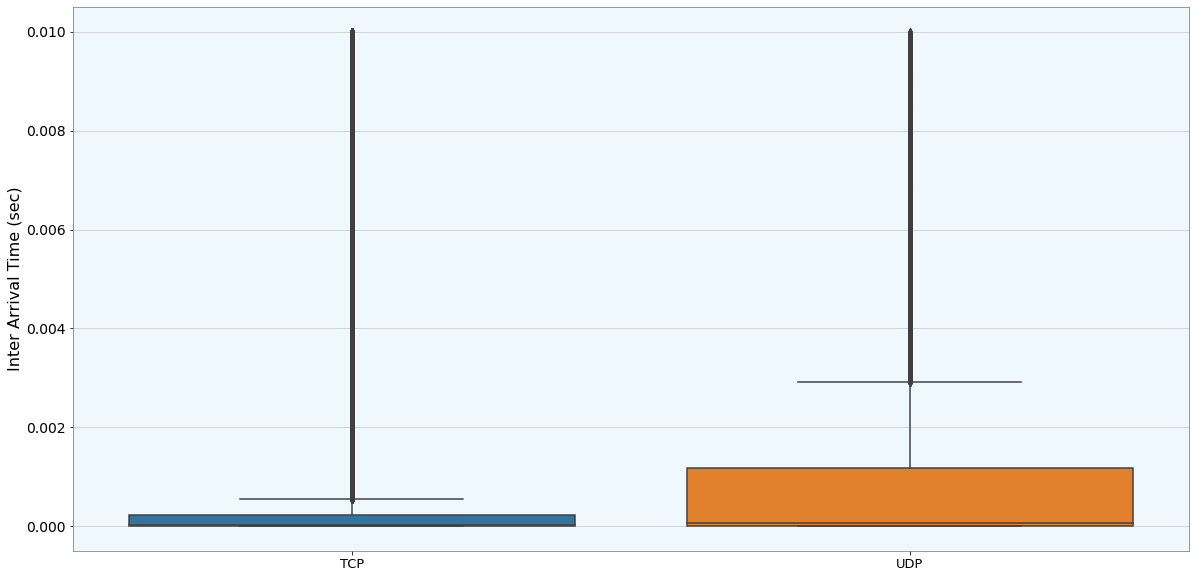

In [ ]:
# Function to define the interarrival time between packets
def InterArrivalTime(data):
    val = np.array(data["time"])
    #Calculate the n-th discrete difference along the given axis
    return np.diff(val)

# Create a copy of the dataframe
data_protocol = copy.deepcopy(df[df["Protocol"].isin([6,17])])
data_protocol["Protocol"] = data_protocol["Protocol"].replace({6:"TCP",17:"UDP"})

# Remove outliers
data_protocol = data_protocol[data_protocol["length"]<= 6000]

# Inter arrival time

tcp_data = data_protocol[data_protocol["Protocol"]=="TCP"]
udp_data = data_protocol[data_protocol["Protocol"]=="UDP"]

inteArr_TCP= []
for elem in tcp_data.groupby(['IP_SRC', 'IP_DST', 'Protocol', 'src_port', 'dst_port']):
    # groupby tuple (key, dataframe)
    inteArr_TCP += InterArrivalTime(elem[1]).tolist()

inteArr_UDP = []
for elem in udp_data.groupby(['IP_SRC', 'IP_DST', 'Protocol', 'src_port', 'dst_port']):
    inteArr_UDP += InterArrivalTime(elem[1]).tolist()


val_ = inteArr_TCP + inteArr_UDP

label_TCP = [ "TCP" for i in range(len(inteArr_TCP))]
label_UDP =[ "UDP" for i in range(len(inteArr_UDP))]

lab_ = label_TCP + label_UDP

d = {'Protocol': lab_, 'IntArrTime': val_}
DataFrame = pd.DataFrame(data = d)

# Plot
plt.figure(figsize = (20, 10))
plt.rcParams['ytick.labelsize'] = 14
df_ = DataFrame[DataFrame["IntArrTime"] < 0.01]
ax = sns.boxplot(x="Protocol", y="IntArrTime", data=df_)
ax.set_xlabel("")
ax.set_ylabel("Inter Arrival Time (sec)",fontsize=16)
#plt.savefig(folder_image +"BoxPlot InterArrivalTime")

print("Mean InterArrivalTime TCP Session: %.2f"% np.mean(np.array(inteArr_TCP)[np.array(inteArr_TCP)<1]))
print("Mean InterArrivalTime UDP Session: %.2f"% np.mean(np.array(inteArr_UDP)[np.array(inteArr_UDP)<1]))

### 10. BONUS

#### Topology of the network

We developed an analysis of the topology of our network using *networkx*.

In [3]:
# Prepare the data to create the network
data_couple = copy.deepcopy(df)
df_srcdst = list(zip(data_couple.IP_SRC, data_couple.IP_DST))
mostcommon_srcdst = Counter(df_srcdst).most_common(len(Counter(df_srcdst)))

list_src = []
list_dst = []
list_count = []

for i in range(len(mostcommon_srcdst)):
    list_src.append(mostcommon_srcdst[i][0][0]) #src pos 0
    list_dst.append(mostcommon_srcdst[i][0][1]) #dst pos 1
    list_count.append(mostcommon_srcdst[i][1])

data_couple = pd.DataFrame(list(zip(list_src, list_dst, list_count)), columns =['IP_SRC', 'IP_DST', 'count'])

In [4]:
# Create the graph which represents the network passing IP sources and destinations
G = nx.from_pandas_edgelist(data_couple, "IP_SRC", "IP_DST", edge_attr = 'count')

First of all, we decided to extract some useful informations about our network, considering it as a graph. We can compute measures like *closeness centrality*, *degree centrality*, *betweenness* and *pagerank* that can tell us what are the most important nodes of our network.

In [ ]:
closeness = nx.closeness_centrality(G)
deg_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

##### PageRank

In [ ]:
sorted(pagerank, key=pagerank.get, reverse = True)[:5]

['203.122.146.18',
 '203.122.128.169',
 '202.239.228.38',
 '202.7.174.242',
 '150.57.136.251']

##### Betweenness

In [ ]:
sorted(betweenness, key=betweenness.get, reverse = True)[:5]

['203.122.146.18',
 '202.7.174.242',
 '202.239.228.38',
 '202.9.53.195',
 '150.57.104.202']

##### Degree Centrality

In [ ]:
sorted(deg_centrality, key=deg_centrality.get, reverse = True)[:5]

['203.122.146.18',
 '203.122.128.169',
 '202.239.228.38',
 '202.7.174.242',
 '150.57.136.251']

##### Closeness Centrality

In [ ]:
sorted(closeness, key=closeness.get, reverse = True)[:5]

['203.122.146.18',
 '185.32.16.30',
 '14.96.80.105',
 '210.140.235.203',
 '58.82.221.186']

Due to the very large amount of nodes and edges, it was very difficult to have a complete picture of our network, so we decided to represent only the subgraph of the node we noticed was most relevant from the previous measures.

In [ ]:
# Most relevant user
user = '203.122.146.18'

# List of the neighborhood of the node
neighborhood = [user] + list(G.neighbors(user))

# Consider a subgraph given by that neighborhood
G_nx = G.subgraph([user] + sample(neighborhood, 1000))

sizes = [1000 if node == user else 400 for node in G_nx]

weights = [G_nx[u][v]['count'] for u,v in G_nx.edges]
c = sum(weights) 
for w in range(len(weights)): 
  if weights[w]/c > 0.1: weights[w] = 15
  else: weights[w] = 2

# Plot 
plt.figure(figsize=(16, 8))
plt.style.use('dark_background')
pos = nx.spring_layout(G_nx)
ax = plt.gca()
ax.margins(0.03)
plt.axis("off")
plt.title(f'Network of the user {user}', fontsize = 22)
box = dict(boxstyle='round', facecolor='snow', alpha=0.7, edgecolor="grey")
plt.tight_layout()

nx.draw_networkx_nodes(G_nx, pos, node_size=400, node_color='white', 
                      alpha = .3, label = 'Neighbors of input node');

nx.draw_networkx_nodes(G_nx, pos, node_size=1000, nodelist = [user], 
                      node_color='crimson', label = 'Input node: {}'.format(user));

nx.draw_networkx_edges(G_nx, pos, edgelist=G_nx.edges, width=weights, alpha = 0.8, edge_color="steelblue", 
                      arrowsize=15, connectionstyle='arc3,rad=0.05');

╔══════════════════════════════════╦═══════╗
║         Number of users          ║ 18004 ║
╠══════════════════════════════════╬═══════╣
║      Number of connections       ║ 21811 ║
╠══════════════════════════════════╬═══════╣
║ Average number of links per user ║ 1.21  ║
╠══════════════════════════════════╬═══════╣
║              Dense               ║ False ║
╚══════════════════════════════════╩═══════╝


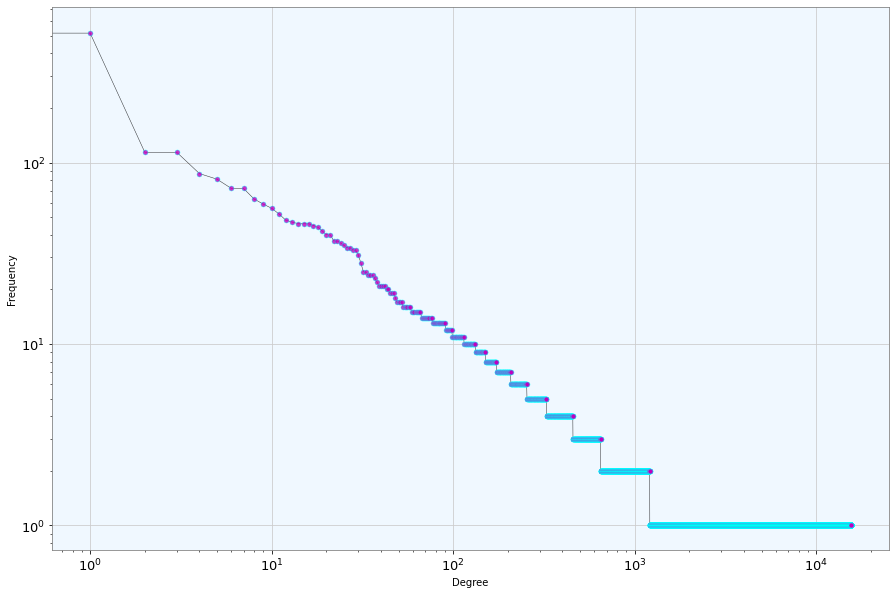

In [6]:
functionality1(data_couple)

#### Time To Leave evaluation

Text(0, 0.5, 'log-scale')

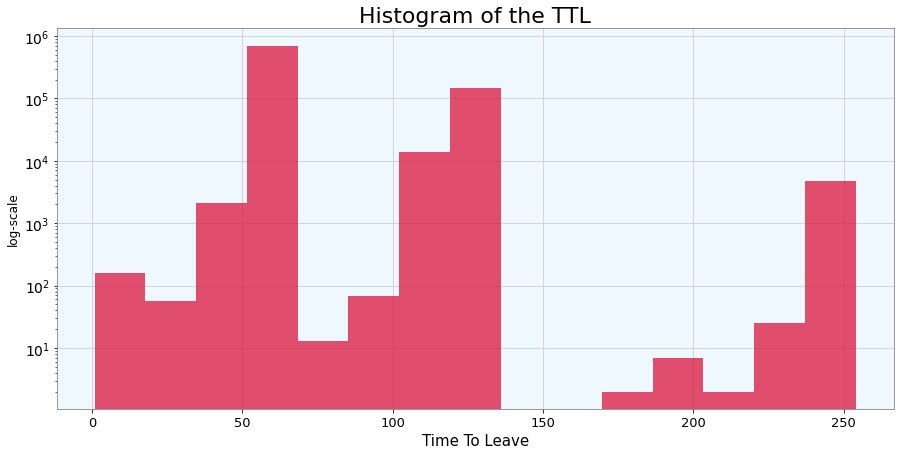

In [ ]:
# Time To Leave
ttl = df['ttl']

# Plot
plt.figure(figsize = (15, 7))
plt.rcParams['ytick.labelsize'] = 14
plt.hist(ttl, bins=15, log = True, color = 'crimson', alpha = .75)
plt.title('Histogram of the TTL', fontsize = 22)
plt.xlabel('Time To Leave', fontsize = 15)
plt.ylabel('log-scale', fontsize = 12)


In [ ]:
# Summary table
table = BeautifulTable()
table.set_style(BeautifulTable.STYLE_BOX_DOUBLED)

table.rows.append(['Maximum', max(ttl)])
table.rows.append(['Minimum', min(ttl)])
table.rows.append(['Mean', np.mean(ttl)])
table.rows.append(['1st quartile', np.quantile(ttl, q = 0.25)])
table.rows.append(['Median', np.quantile(ttl, q = 0.50)])
table.rows.append(['3rd quartile', np.quantile(ttl, q = 0.75)])

print(table)

╔══════════════╦════════╗
║   Maximum    ║  254   ║
╠══════════════╬════════╣
║   Minimum    ║   1    ║
╠══════════════╬════════╣
║     Mean     ║ 70.328 ║
╠══════════════╬════════╣
║ 1st quartile ║  56.0  ║
╠══════════════╬════════╣
║    Median    ║  57.0  ║
╠══════════════╬════════╣
║ 3rd quartile ║  60.0  ║
╚══════════════╩════════╝


In [ ]:
# Sessions with highest TTL
df[df['ttl'] == 254]
# They share all the same protocol: 1 = ICMP

,Label DSCP,headerLen,ds_field,ds_field_ecn,length,Protocol,flag_df,flag_mf,flag_rb,fragment_offset,ttl,IP_SRC,IP_DST,src_port,dst_port,time
18492,0,20,0,0,56,1,0,0,0,0,254,203.122.136.81,203.146.58.165,-1,-1,0.086155
133626,0,20,0,0,56,1,0,0,0,0,254,203.122.136.81,203.146.100.252,-1,-1,0.562860
140824,0,20,0,0,128,1,1,0,0,0,254,202.9.10.107,101.160.45.243,-1,-1,0.590103
142848,0,20,0,0,56,1,0,0,0,0,254,202.9.10.108,10.119.243.78,-1,-1,0.597897
171384,0,20,0,0,56,1,0,0,0,0,254,203.122.136.81,203.146.103.109,-1,-1,0.724366
193750,0,20,0,0,56,1,0,0,0,0,254,203.122.136.81,203.146.100.157,-1,-1,0.827610
208388,0,20,0,0,56,1,0,0,0,0,254,203.122.136.81,49.224.234.28,-1,-1,0.897318
288744,0,20,0,0,56,1,0,0,0,0,254,202.9.10.108,172.26.197.176,-1,-1,1.231934
333501,0,20,0,0,56,1,0,0,0,0,254,203.122.136.81,203.159.47.226,-1,-1,1.404460
381096,0,20,0,0,128,1,1,0,0,0,254,202.9.10.107,101.160.45.243,-1,-1,1.591821


In [ ]:
# Sessions with the lowest TTL
df[df['ttl'] == 1]
# These sessions are only between 3 couples of addresses

,Label DSCP,headerLen,ds_field,ds_field_ecn,length,Protocol,flag_df,flag_mf,flag_rb,fragment_offset,ttl,IP_SRC,IP_DST,src_port,dst_port,time
7233,0,20,0,0,30,1,0,0,0,0,1,203.122.133.99,133.59.44.215,-1,-1,0.035173
18338,0,20,0,0,30,1,0,0,0,0,1,203.122.133.99,133.59.44.215,-1,-1,0.085385
30502,0,20,0,0,30,1,0,0,0,0,1,203.122.133.99,133.59.44.215,-1,-1,0.135614
42060,0,20,0,0,30,1,0,0,0,0,1,203.122.133.99,133.59.44.215,-1,-1,0.185849
96879,0,20,0,0,68,17,0,0,0,0,1,192.175.9.4,202.239.228.38,20484,33447,0.421100
166277,0,20,0,0,68,17,0,0,0,0,1,192.175.9.4,202.239.228.38,20484,33447,0.701903
229329,0,20,0,0,68,17,0,0,0,0,1,192.175.9.4,202.239.228.38,20484,33447,0.982464
684300,48,20,192,0,76,89,0,0,0,0,1,203.122.140.149,224.0.0.5,-1,-1,2.818612
684301,48,20,192,0,76,89,0,0,0,0,1,203.122.140.149,224.0.0.5,-1,-1,2.818614


## Part B - Unsupervised Learning

We decided to perform an unsupervised learning task. Our idea was to classify the top 4 mostly used protocols (TCP, ECMP, UDP and IPv4) with the K-Means algorithm.

In addition, we performed on the dataset a dimensionality reduction with a PCA, in order to be able to plot in a low-dimensional space our packets.

Text(0.5, 1.0, 'Data divided by clusters')

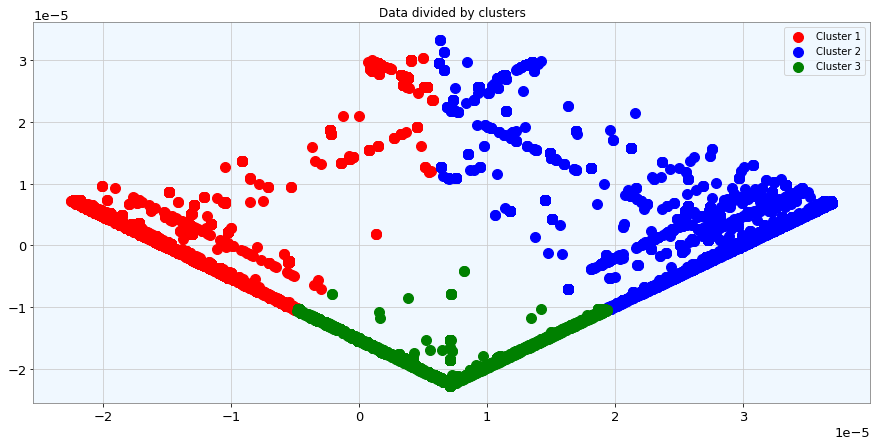

In [ ]:
# Extract data from the 4 chosen protocols
data_cluster = copy.deepcopy(df[df["Protocol"].isin([1, 4, 6, 17])])
X_df = data_cluster.drop(columns = ['Protocol', 'IP_SRC', 'IP_DST', 'Label DSCP'])
Y = data_cluster.iloc[:,5]

# =============================================================================
# PCA - Dimensionality reduction
# =============================================================================

X = normalize(X_df)                           # Normalize data
n_comp = X.shape[1]                           # Set the number of principal components equal to the number of columns 
# Run the PCA
pca = PCA(n_comp, random_state = 1863151)
pca_train = pca.fit_transform(X)

# Check the variance explained by the principal components
cumvar = np.cumsum(pca.explained_variance_ratio_) #maggiore soglia + screeplot
print(cumvar)

# The first two principal components explained more of the 99% of the total variance
# We can consider only them
pca_train = pca_train[:, :2]

# =============================================================================
# K-Means Initialization
# =============================================================================
#Step:
#1) Extract train and test from our starting dataset
#2) Apply oversampling to rebalance in the training the number of occurrences
#3) Find the optimal K (number of clusters) according to the training
#4) Apply this clustering to the test

x_train, x_test, y_train, y_test = train_test_split(pca_train, Y, test_size = 0.20, random_state = 0)
# Apply oversampling setting as number of samples the one of the most used protocol <- TCP
oversample = SMOTE(sampling_strategy={1:sum(y_train==6),
                                      4:sum(y_train==6),
                                      6:sum(y_train==6),
                                      17:sum(y_train==6)})
X_over, Y_over = oversample.fit_resample(x_train, y_train)

# Print some info about the sampling
print()
print("Starting y_train distribution: ", Counter(y_train))
print("Distribution of the labels after oversampling: ", Counter(y_train))
print()
print("Distribution of the labels after oversampling: ", Counter(Y_over))
print("Distribution of the labels after oversampling: ", Counter(Y_over))
print()

# K-Means initialization
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 123,
}

# =============================================================================
# # A list holds the SSE (sum of squared errors) values for each k
# =============================================================================
sse = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k,**kmeans_kwargs)
    kmeans.fit(X_over)
    sse.append(kmeans.inertia_)
    
# =============================================================================
# # Elbow Method    
# =============================================================================

plt.plot(range(1, 6), sse)
plt.xticks(range(1, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#Extract the minimum in the convex curve 

kl = KneeLocator(
    range(1, 6), sse, curve="convex", direction="decreasing")

print("Optimal number of clusters: ", kl.elbow)
opt = kl.elbow # Set the optimal number of clusters detected by the elbow method

# Apply again K.Means with this specific number of clusters

kmeans = KMeans(
    init="random",
    n_clusters=opt,
    n_init=10,
    max_iter=300,
    random_state=123
)
kmeans.fit(X_over)


# Observe the results
# In each cluster finding the occurrences of the protocols labels

dict_label_prot = {}

for i in list(set(kmeans.labels_)):
    #print(sum(kmeans.labels_== i))
    ind = []
    for s, j in enumerate(kmeans.labels_):
        if j == i:
            ind.append(s) 

    print("Label: ",i)
    stats = Counter(Y_over[ind])
    print(stats)
    print(max(stats.items(), key=operator.itemgetter(1))[0])
    dict_label_prot[i] = max(stats.items(), key=operator.itemgetter(1))[0]
    print()
    print()
    
# =============================================================================
# # Predictions on test data and confusion matrix function
# =============================================================================
pred = kmeans.predict(x_test)    

prediction = [ dict_label_prot[elem] for elem in pred ]    

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.YlOrBr):
    
    '''Confusion Matrix Evaluation'''
    
    plt.figure(figsize=(9,9))
    plt.matshow(df_confusion, cmap=cmap,fignum=1) # imshow
    
    for (i, j), z in np.ndenumerate(df_confusion):
        plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
                 bbox=dict(boxstyle='round', facecolor='white'))
    
    # Plot
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45,fontsize = 13)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(tick_marks, df_confusion.index,fontsize = 13)
    plt.tight_layout()
    plt.ylabel("True",fontsize = 18)
    plt.xlabel("Predicted",fontsize = 18)
    plt.grid(False)
    #plt.savefig("")
    plt.show()

# =============================================================================
# Confusion Matrix evaluation   
# =============================================================================

# Protocol labels
labels = [1, 4, 6, 17]

# Confusion matrix
confmatrix = confusion_matrix(y_test, 
                              prediction,
                              labels = labels)

df_confusion = pd.DataFrame(confmatrix, index=labels, columns=labels)
df_conf_norm = df_confusion.div(df_confusion.sum(axis=1),axis=0)

# Plot the confusion matrix
plot_confusion_matrix(df_conf_norm)

# Plot the data divided by cluster on the 2-dimensional space of the first 2 principal components
plt.figure(figsize = (15, 7))
plt.scatter(x_test[pred==0, 0], x_test[pred==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x_test[pred==1, 0], x_test[pred==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x_test[pred==2, 0], x_test[pred==2, 1], s=100, c='green', label ='Cluster 3')
plt.legend()
plt.title('Data divided by clusters')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.show()

# Plot the data divided by protocol labels on the 2-dimensional space of the first 2 principal components
plt.figure(figsize = (15, 7))
plt.scatter(x_test[y_test==17, 0], x_test[y_test==17, 1], s=100, c='purple', label ='TCP')
plt.scatter(x_test[y_test==6, 0], x_test[y_test==6, 1], s=100, c='green', label ='UDP')
plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], s=100, c='red', label ='ECMP')
plt.scatter(x_test[y_test==4, 0], x_test[y_test==4, 1], s=100, c='blue', label ='IPv4')
plt.legend()
plt.title('Data divided by protocols')